In [3]:
pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 1.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.6 MB 1.4 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.6 MB 2.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.6 MB 2.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.6 MB 2.9 MB/s eta 0:00:01
   ----------------------------- ---------- 1.2/1.6 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/203.0 MB 98.6 MB/s eta 0:00:03
    --------------------------------------- 4.0/203.0 MB 51.1 MB/s eta 0:00:04
   - -------------------------------------- 7.1/203.0 MB 56.4 MB/s eta 0:00:04
   - -------------------------------------- 7.1/203.0 MB 50.3 MB/s eta 0:00:04
   - -------


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from torchvision import datasets
from torchvision.transforms import ToTensor

def get_data(is_train, path = 'data', transform = ToTensor()):
    return datasets.FashionMNIST(
                root=path,
                train=is_train,
                download=True,
                transform=transform
            )

In [5]:
BATCH_SIZE = 64

LEARNING_RATE = 1E-3
EPOCHS = 50

In [6]:
from torch import nn

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)
    model.train()
    sum_loss = 0

    for batch, (X, y) in enumerate(dataloader):

        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            current = batch * len(X)
            print(f'loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]')
            
    return sum_loss / len(dataloader)

In [8]:
from torch import no_grad, float

def test_loop(dataloader, model, loss_fn):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with no_grad():

        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

    return test_loss

In [9]:
def run_training(epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer):

    test_losses = []

    for t in range(epochs):
        
        print(f'Epoch {t+1}\n-------------------------------')
        train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loss = test_loop(test_dataloader, model, loss_fn)
        test_losses.append(test_loss)

    print('Done!')

    return test_losses

In [10]:
training_data = get_data(is_train=True)
test_data = get_data(is_train=False)

0.1%

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [12]:
from torch.optim import SGD, RMSprop, Adam

model = NeuralNetwork()
optimizer_sgd = SGD(model.parameters(), lr=LEARNING_RATE)
print('Training with SGD optimizer')
test_loss_sgd = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_sgd)

Training with SGD optimizer
Epoch 1
-------------------------------
loss: 2.298629  [    0/60000]
loss: 2.291268  [ 6400/60000]
loss: 2.274098  [12800/60000]
loss: 2.264780  [19200/60000]
loss: 2.244391  [25600/60000]
loss: 2.221597  [32000/60000]
loss: 2.228859  [38400/60000]
loss: 2.193851  [44800/60000]
loss: 2.191838  [51200/60000]
loss: 2.159862  [57600/60000]
Test Error: 
 Accuracy: 48.1%, Avg loss: 2.150171 

Epoch 2
-------------------------------
loss: 2.160922  [    0/60000]
loss: 2.153073  [ 6400/60000]
loss: 2.087641  [12800/60000]
loss: 2.099802  [19200/60000]
loss: 2.054034  [25600/60000]
loss: 1.991309  [32000/60000]
loss: 2.027074  [38400/60000]
loss: 1.938037  [44800/60000]
loss: 1.946192  [51200/60000]
loss: 1.876931  [57600/60000]
Test Error: 
 Accuracy: 57.0%, Avg loss: 1.864214 

Epoch 3
-------------------------------
loss: 1.899608  [    0/60000]
loss: 1.874450  [ 6400/60000]
loss: 1.739992  [12800/60000]
loss: 1.784149  [19200/60000]
loss: 1.692076  [25600/60000

In [13]:
model = NeuralNetwork()
optimizer_rms = RMSprop(model.parameters(), lr=LEARNING_RATE, alpha=0.9)
print('Training with RMSprop optimizer')
test_loss_rms = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_rms)

Training with RMSprop optimizer
Epoch 1
-------------------------------
loss: 2.303881  [    0/60000]
loss: 0.587110  [ 6400/60000]
loss: 0.458827  [12800/60000]
loss: 0.496801  [19200/60000]
loss: 0.479458  [25600/60000]
loss: 0.415252  [32000/60000]
loss: 0.395175  [38400/60000]
loss: 0.514746  [44800/60000]
loss: 0.534121  [51200/60000]
loss: 0.471741  [57600/60000]
Test Error: 
 Accuracy: 82.5%, Avg loss: 0.458552 

Epoch 2
-------------------------------
loss: 0.276878  [    0/60000]
loss: 0.326664  [ 6400/60000]
loss: 0.300769  [12800/60000]
loss: 0.335456  [19200/60000]
loss: 0.329315  [25600/60000]
loss: 0.394687  [32000/60000]
loss: 0.304999  [38400/60000]
loss: 0.415182  [44800/60000]
loss: 0.455108  [51200/60000]
loss: 0.344987  [57600/60000]
Test Error: 
 Accuracy: 83.8%, Avg loss: 0.461019 

Epoch 3
-------------------------------
loss: 0.234554  [    0/60000]
loss: 0.332579  [ 6400/60000]
loss: 0.227552  [12800/60000]
loss: 0.305283  [19200/60000]
loss: 0.331544  [25600/6

In [14]:
model = NeuralNetwork()
optimizer_adam = Adam(model.parameters(), lr=LEARNING_RATE)
print('Training with Adam optimizer')
test_loss_adam = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_adam)

Training with Adam optimizer
Epoch 1
-------------------------------
loss: 2.301653  [    0/60000]
loss: 0.574309  [ 6400/60000]
loss: 0.382374  [12800/60000]
loss: 0.515121  [19200/60000]
loss: 0.449527  [25600/60000]
loss: 0.438997  [32000/60000]
loss: 0.379485  [38400/60000]
loss: 0.542801  [44800/60000]
loss: 0.476266  [51200/60000]
loss: 0.517829  [57600/60000]
Test Error: 
 Accuracy: 84.2%, Avg loss: 0.430024 

Epoch 2
-------------------------------
loss: 0.262516  [    0/60000]
loss: 0.371401  [ 6400/60000]
loss: 0.294586  [12800/60000]
loss: 0.411611  [19200/60000]
loss: 0.387770  [25600/60000]
loss: 0.358201  [32000/60000]
loss: 0.298491  [38400/60000]
loss: 0.476605  [44800/60000]
loss: 0.437832  [51200/60000]
loss: 0.457866  [57600/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.404553 

Epoch 3
-------------------------------
loss: 0.244855  [    0/60000]
loss: 0.361818  [ 6400/60000]
loss: 0.250129  [12800/60000]
loss: 0.347168  [19200/60000]
loss: 0.353382  [25600/6000

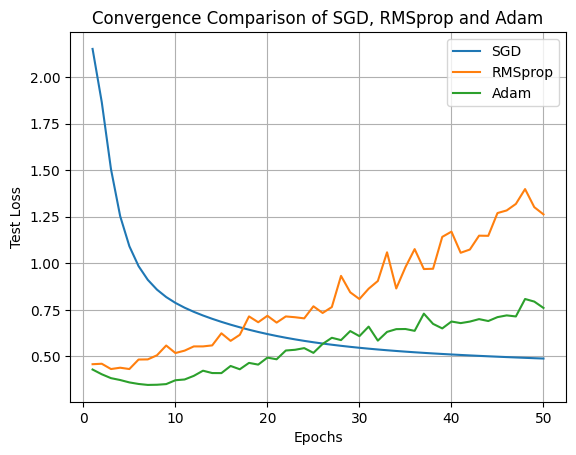

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, EPOCHS + 1), test_loss_sgd, label='SGD')
plt.plot(range(1, EPOCHS + 1), test_loss_rms, label='RMSprop')
plt.plot(range(1, EPOCHS + 1), test_loss_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Convergence Comparison of SGD, RMSprop and Adam')
plt.grid(True)
plt.legend()
plt.show()